In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.922805,14900.467836
1,0.840587,16145.824007
2,0.849058,16952.720646
3,0.899773,14343.120864
4,0.916531,14119.822850
5,0.868744,14441.179960
6,0.918627,14610.265098
7,0.880011,14900.389274
8,0.915024,14762.934399
9,0.863660,15357.635508


In [9]:
ordinal_drop1 = pd.read_csv('OrdinalDrop1.csv')

In [10]:
ordinal_drop1.shape

(2579, 83)

In [11]:
X2 = ordinal_drop1.drop(['SalePrice'], axis=1).values
y2 = ordinal_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 82)

In [14]:
X2.shape[1]

82

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)



In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.900574,14564.674388
1,0.918616,14479.252653
2,0.904007,14113.685241
3,0.911511,14300.749443
4,0.877648,16168.989190
5,0.875351,14912.586949
6,0.897054,15283.566043
7,0.902164,14583.017303
8,0.898909,14356.686791
9,0.885649,15880.582679


In [17]:
ordinal_drop_IF = pd.read_csv('OrdinalDropIF.csv')

In [18]:
ordinal_drop_IF.shape

(2568, 83)

In [19]:
X3 = ordinal_drop_IF.drop(['SalePrice'], axis=1).values
y3 = ordinal_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [21]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.895145,14938.861973
1,0.903005,14327.012558
2,0.882881,15001.812342
3,0.900807,14631.183448
4,0.904143,14427.994640
5,0.906117,14622.803604
6,0.916801,14556.217722
7,0.906246,13972.154625
8,0.909237,14457.520194
9,0.904599,14720.021557


In [22]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.922805,14900.467836,0.900574,14564.674388,0.895145,14938.861973
1,0.840587,16145.824007,0.918616,14479.252653,0.903005,14327.012558
2,0.849058,16952.720646,0.904007,14113.685241,0.882881,15001.812342
3,0.899773,14343.120864,0.911511,14300.749443,0.900807,14631.183448
4,0.916531,14119.822850,0.877648,16168.989190,0.904143,14427.994640
5,0.868744,14441.179960,0.875351,14912.586949,0.906117,14622.803604
6,0.918627,14610.265098,0.897054,15283.566043,0.916801,14556.217722
7,0.880011,14900.389274,0.902164,14583.017303,0.906246,13972.154625
8,0.915024,14762.934399,0.898909,14356.686791,0.909237,14457.520194
9,0.863660,15357.635508,0.885649,15880.582679,0.904599,14720.021557


In [23]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.884473,15043.494402,0.900728,14797.072301,0.900921,14695.235915
std,0.027414,752.780131,0.011466,664.679603,0.011134,589.232905
min,0.811664,13356.765879,0.872992,12877.337336,0.868591,13593.284828
25%,0.866098,14527.608127,0.895240,14350.299095,0.894123,14380.554712
50%,0.888670,14926.860874,0.900937,14764.026632,0.902626,14606.429605
75%,0.905855,15596.789904,0.908775,15284.203811,0.909504,14989.744521
max,0.922805,16952.720646,0.926378,16358.524013,0.921435,16978.106722


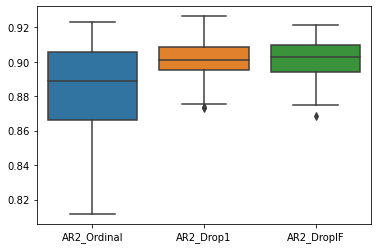

In [24]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

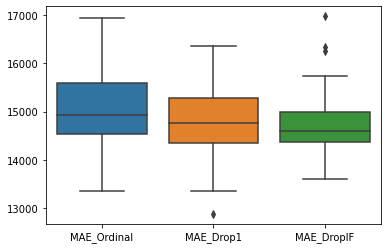

In [25]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);